In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [3]:
def show_orignal_images(pixels):
    fig, axes = plt.subplots(6, 10, figsize=(11, 7),subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

In [4]:
def show_eigenfaces(pca):

    fig, axes = plt.subplots(3, 8, figsize=(9, 4),subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
        ax.set_title("PC " + str(i+1))
    plt.show()

In [46]:
df = pd.read_csv("https://raw.githubusercontent.com/codeheroku/Introduction-to-Machine-Learning/master/Face%20Recognition%20Using%20PCA/face_data.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [43]:
targets = df["target"]
pixels = df.drop(["target"],axis=1)

(400, 4096)


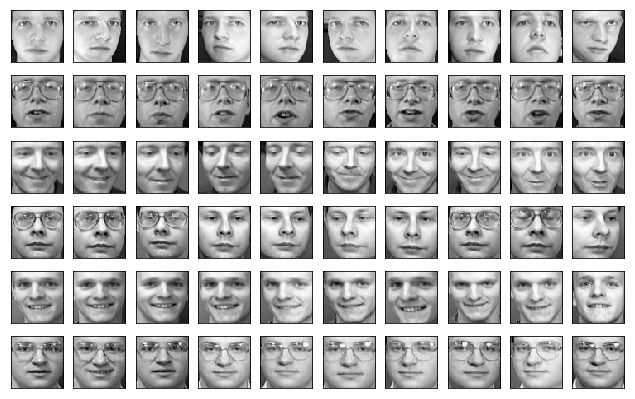

In [6]:
print(np.array(pixels).shape)

show_orignal_images(pixels)

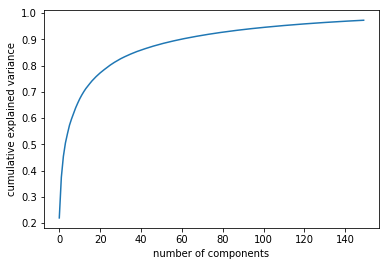

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


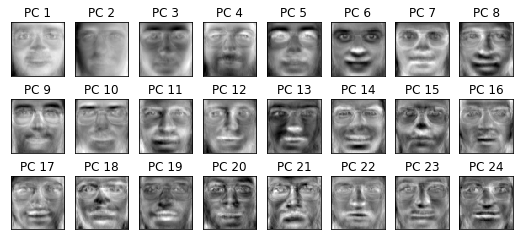

In [47]:
x_train, x_test, y_train, y_test = train_test_split(pixels, targets)

pca = PCA(n_components=150).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

show_eigenfaces(pca)

In [8]:
print("Projecting the input data on the eigenfaces orthonormal basis")
Xtrain_pca = pca.transform(x_train)

clf = SVC(kernel='rbf',C=1000,gamma=0.001)
clf = clf.fit(Xtrain_pca, y_train)

Projecting the input data on the eigenfaces orthonormal basis


In [9]:
print("Predicting people's names on the test set")

t0 = time()

Xtest_pca = pca.transform(x_test)

y_pred = clf.predict(Xtest_pca)

print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred))

Predicting people's names on the test set
done in 0.026s
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         3
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       0.50      1.00      0.67         1
          15       0.50      1.00      0.67         1
          16       1.00      1.00      1.00         3
          17       1.00 

In [16]:
x_test.shape

(100, 4096)

In [13]:
Xtest_pca.shape

(100, 150)

In [30]:
import cv2
from matplotlib import pyplot as plt
test_img = cv2.imread('images/image-12.png',0)

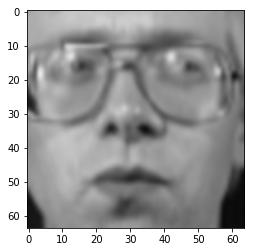

In [31]:
plt.imshow(test_img, cmap = 'gray', interpolation = 'bicubic')

In [32]:
test_img.shape

(64, 64)

In [33]:
test_img = test_img.reshape(1,4096)

In [34]:
test_img.shape

(1, 4096)

In [35]:
test_img_pca = pca.transform(test_img)

In [41]:
y_pred_test = clf.predict(Xtest_pca)

In [42]:
y_pred_test

array([21,  1, 32,  5,  8, 17, 35, 38, 34, 22, 34,  9, 13, 19, 37,  8, 36,
       35,  4, 16,  3, 16, 27, 28, 18, 13, 15, 20, 14, 33, 39, 35, 26, 35,
        4, 36, 10,  5, 31, 21, 17, 39, 28, 37,  0, 18, 34, 14, 20, 11, 26,
       30,  0, 19, 11,  7, 30,  0,  6, 26,  9, 11, 26, 25, 29, 15,  5,  6,
       30, 17, 17, 33, 29, 16,  5, 37, 23, 35, 17, 34,  0, 33, 27, 39, 24,
       29, 33, 13, 33, 28, 26, 25, 31,  1, 25, 25,  2,  1, 25,  2])